In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.interpolate import UnivariateSpline
from patsy import dmatrix

#from pygam import GAM, s, f
from IPython.display import Image
%matplotlib inline

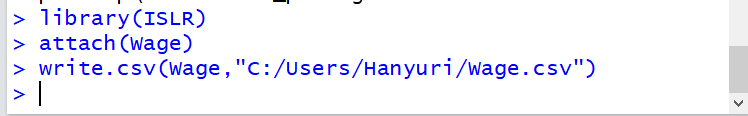

In [2]:
Image("C:\\Users\\Hanyuri\\Documents\\문서\\대학원 스터디\\R_data.png")

In [3]:
wage=pd.read_csv('C:\\Users\\Hanyuri\\Wage.csv',engine='python',encoding='949')
wage.head()

,Unnamed: 0,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [4]:
wage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
Unnamed: 0    3000 non-null int64
year          3000 non-null int64
age           3000 non-null int64
maritl        3000 non-null object
race          3000 non-null object
education     3000 non-null object
region        3000 non-null object
jobclass      3000 non-null object
health        3000 non-null object
health_ins    3000 non-null object
logwage       3000 non-null float64
wage          3000 non-null float64
dtypes: float64(2), int64(3), object(7)
memory usage: 281.3+ KB


# Polynomial Regression and Step Functions

In [5]:
x1 = PolynomialFeatures(1).fit_transform(wage['age'].values.reshape(-1,1))
x2 = PolynomialFeatures(2).fit_transform(wage['age'].values.reshape(-1,1))
x3 = PolynomialFeatures(3).fit_transform(wage['age'].values.reshape(-1,1))
x4 = PolynomialFeatures(4).fit_transform(wage['age'].values.reshape(-1,1))
x5 = PolynomialFeatures(5).fit_transform(wage['age'].values.reshape(-1,1))

In [6]:
lm=smf.ols(formula='wage ~ x4',data=wage).fit()
lm.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-92.0771,30.020,-3.067,0.002,-150.939,-33.215
x4[0],-92.0771,30.020,-3.067,0.002,-150.939,-33.215
x4[1],21.2455,5.887,3.609,0.000,9.703,32.788
x4[2],-0.5639,0.206,-2.736,0.006,-0.968,-0.160
x4[3],0.0068,0.003,2.221,0.026,0.001,0.013
x4[4],-3.204e-05,1.64e-05,-1.952,0.051,-6.42e-05,1.45e-07


In [7]:
fit1=smf.ols(formula='wage ~ x1',data=wage).fit()
fit2=smf.ols(formula='wage ~ x2',data=wage).fit()
fit3=smf.ols(formula='wage ~ x3',data=wage).fit()
fit4=smf.ols(formula='wage ~ x4',data=wage).fit()
fit5=smf.ols(formula='wage ~ x5',data=wage).fit()
sm.stats.anova_lm(fit1,fit2,fit3,fit4,fit5, typ=1)

C:\Users\Hanyuri\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Hanyuri\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Hanyuri\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2998.0,5.022216e+06,0.0,NaN,NaN,NaN
1,2997.0,4.793430e+06,1.0,228786.010128,143.593107,2.363850e-32
2,2996.0,4.777674e+06,1.0,15755.693664,9.888756,1.679202e-03
3,2995.0,4.771604e+06,1.0,6070.152124,3.809813,5.104620e-02
4,2994.0,4.770322e+06,1.0,1282.563017,0.804976,3.696820e-01


In [8]:
#  df_resid : 잔차 자유도
#  ssr(rss) : 잔차 제곱합
#  df_diff : 이전 모델과의 자유도 차이
#  ss_diff : 이전 모델과의 ssr 차이
# fit1과 fit2의 차이가 1번 이고 , fit2와 fit3의 차이가 2번 임
# 여러모델 분석은 tpy=1 일때만 가능
# 여기서는 단순히 차수에 따른 모델의 차이를 나타냄. p값을 살펴보면 3차와 4차의 p값이 0.05쯤으로 가장 적합


In [9]:
fit5.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-24.8523,80.718,-0.308,0.758,-183.120,133.415
x5[0],-24.8523,80.718,-0.308,0.758,-183.120,133.415
x5[1],3.9930,20.110,0.199,0.843,-35.438,43.424
x5[2],0.2760,0.958,0.288,0.773,-1.603,2.155
x5[3],-0.0126,0.022,-0.577,0.564,-0.056,0.030
x5[4],0.0002,0.000,0.762,0.446,-0.000,0.001
x5[5],-9.157e-07,1.02e-06,-0.897,0.370,-2.92e-06,1.09e-06


In [11]:
fit6=smf.ols(formula='wage ~ education+age',data=wage).fit()
fit7=smf.ols(formula='wage ~ education+x2',data=wage).fit()
fit8=smf.ols(formula='wage ~ education+x3',data=wage).fit()
sm.stats.anova_lm(fit6,fit7,fit8, typ=1)

C:\Users\Hanyuri\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Hanyuri\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Hanyuri\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2994.0,3.867992e+06,0.0,NaN,NaN,NaN
1,2993.0,3.725395e+06,1.0,142597.097010,114.696898,2.728001e-26
2,2992.0,3.719809e+06,1.0,5586.660322,4.493588,3.410431e-02


In [17]:
y = (wage['wage'] > 250).map({False:0, True:1}).values
print('X4:\n', x4[:5])
print('y:\n', y[:5])

X4:
 [[1.000000e+00 1.800000e+01 3.240000e+02 5.832000e+03 1.049760e+05]
 [1.000000e+00 2.400000e+01 5.760000e+02 1.382400e+04 3.317760e+05]
 [1.000000e+00 4.500000e+01 2.025000e+03 9.112500e+04 4.100625e+06]
 [1.000000e+00 4.300000e+01 1.849000e+03 7.950700e+04 3.418801e+06]
 [1.000000e+00 5.000000e+01 2.500000e+03 1.250000e+05 6.250000e+06]]
y:
 [0 0 0 0 0]


In [18]:
X=x4
glm= sm.GLM(y, X, family=sm.families.Binomial(sm.families.links.logit))
fit9 = glm.fit()

In [19]:
age_grid = np.arange(wage['age'].min(), wage['age'].max()).reshape(-1,1)

In [20]:
x_test = PolynomialFeatures(4).fit_transform(age_grid)
pred = fit9.predict(x_test)

In [21]:
print(pred)

[9.82634937e-09 7.57779324e-08 4.74667193e-07 2.44918909e-06
 1.05518393e-05 3.84579175e-05 1.20077637e-04 3.25091487e-04
 7.72040417e-04 1.62616907e-03 3.07023498e-03 5.24879363e-03
 8.20485976e-03 1.18387799e-02 1.59120176e-02 2.00965853e-02
 2.40491763e-02 2.74812237e-02 3.02037371e-02 3.21404191e-02
 3.33148289e-02 3.38229293e-02 3.38019929e-02 3.34034068e-02
 3.27729620e-02 3.20391409e-02 3.13081209e-02 3.06635145e-02
 3.01688926e-02 2.98715121e-02 2.98061403e-02 2.99982685e-02
 3.04662977e-02 3.12224403e-02 3.22721602e-02 3.36119979e-02
 3.52256716e-02 3.70784490e-02 3.91100371e-02 4.12266947e-02
 4.32939606e-02 4.51322916e-02 4.65188129e-02 4.71989768e-02
 4.69116195e-02 4.54290486e-02 4.26097529e-02 3.84549803e-02
 3.31528522e-02 2.70881563e-02 2.07982242e-02 1.48709870e-02
 9.80931728e-03 5.91196222e-03 3.22355296e-03 1.57417531e-03
 6.81294721e-04 2.58479564e-04 8.49845408e-05 2.39248738e-05
 5.69503524e-06 1.13135918e-06]


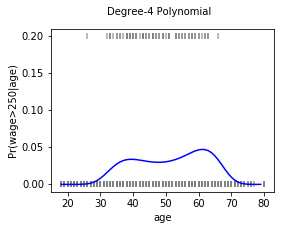

In [22]:
fig, (ax2) = plt.subplots(1, figsize=(4,3))
fig.suptitle('Degree-4 Polynomial', fontsize=10)
ax2.plot(age_grid, pred, color='b')

ax2.scatter(wage['age'], y/5, s=30, c='grey', marker='|', alpha=0.7)

ax2.set_ylim(-0.01,0.21)
ax2.set_xlabel('age')
ax2.set_ylabel('Pr(wage>250|age)');

# Step Function

In [23]:
df_cut, bins = pd.cut(wage['age'], 4, retbins=True, right=True)
df_cut.value_counts(sort=False)

(17.938, 33.5]     750
(33.5, 49.0]      1399
(49.0, 64.5]       779
(64.5, 80.0]        72
Name: age, dtype: int64

In [24]:
df_steps = pd.concat([wage['age'], df_cut, wage['wage']], keys=['age','age_cuts','wage'], axis=1)
df_steps.head()

,age,age_cuts,wage
0,18,"(17.938, 33.5]",75.043154
1,24,"(17.938, 33.5]",70.476020
2,45,"(33.5, 49.0]",130.982177
3,43,"(33.5, 49.0]",154.685293
4,50,"(49.0, 64.5]",75.043154


In [25]:
fit9=smf.ols(formula='wage ~ age_cuts',data=df_steps).fit()

In [26]:
fit9.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,94.1584,1.476,63.790,0.000,91.264,97.053
"age_cuts[T.Interval(33.5, 49.0, closed='right')]",24.0535,1.829,13.148,0.000,20.466,27.641
"age_cuts[T.Interval(49.0, 64.5, closed='right')]",23.6646,2.068,11.443,0.000,19.610,27.719
"age_cuts[T.Interval(64.5, 80.0, closed='right')]",7.6406,4.987,1.532,0.126,-2.139,17.420


# Splines

In [28]:
transformed_x = dmatrix("bs(wage['age'], knots=(25,40,60), degree=3, include_intercept=False)",
                        {"wage['age']": wage['age']}, return_type='dataframe')
fit4 = sm.GLM(wage['wage'], transformed_x).fit()
pred4 = fit4.predict(dmatrix("bs(age_grid, knots=(25,40,60), degree=3, include_intercept=False)",
                             {"age_grid": age_grid}, return_type='dataframe'))
fit4.params

Intercept                                                                    60.493714
bs(wage['age'], knots=(25, 40, 60), degree=3, include_intercept=False)[0]     3.980500
bs(wage['age'], knots=(25, 40, 60), degree=3, include_intercept=False)[1]    44.630980
bs(wage['age'], knots=(25, 40, 60), degree=3, include_intercept=False)[2]    62.838788
bs(wage['age'], knots=(25, 40, 60), degree=3, include_intercept=False)[3]    55.990830
bs(wage['age'], knots=(25, 40, 60), degree=3, include_intercept=False)[4]    50.688098
bs(wage['age'], knots=(25, 40, 60), degree=3, include_intercept=False)[5]    16.606142
dtype: float64

In [29]:
transformed_x2 = dmatrix("bs(wage['age'], df=6, degree=3, include_intercept=False)",
                        {"wage['age']": wage['age']}, return_type='dataframe')
fit5 = sm.GLM(wage['wage'], transformed_x2).fit()
pred5 = fit5.predict(dmatrix("bs(age_grid, df=6, degree=3, include_intercept=False)",
                             {"age_grid": age_grid}, return_type='dataframe'))
fit5.params

Intercept                                                      56.313841
bs(wage['age'], df=6, degree=3, include_intercept=False)[0]    27.824002
bs(wage['age'], df=6, degree=3, include_intercept=False)[1]    54.062546
bs(wage['age'], df=6, degree=3, include_intercept=False)[2]    65.828391
bs(wage['age'], df=6, degree=3, include_intercept=False)[3]    55.812734
bs(wage['age'], df=6, degree=3, include_intercept=False)[4]    72.131473
bs(wage['age'], df=6, degree=3, include_intercept=False)[5]    14.750876
dtype: float64

In [30]:
transformed_x3 = dmatrix("cr(wage['age'], df=4)", {"wage['age']": wage['age']}, return_type='dataframe')
fit6 = sm.GLM(wage['wage'], transformed_x3).fit()
pred6 = fit6.predict(dmatrix("cr(age_grid, df=4)", {"age_grid": age_grid}, return_type='dataframe'))
fit6.params

Intercept                   79.642095
cr(wage['age'], df=4)[0]   -14.667784
cr(wage['age'], df=4)[1]    36.811142
cr(wage['age'], df=4)[2]    35.934874
cr(wage['age'], df=4)[3]    21.563863
dtype: float64

In [31]:
transformed_x4 = dmatrix("bs(wage['age'], df=16, degree=3, include_intercept=False)",
                        {"wage['age']": wage['age']}, return_type='dataframe')
fit7= sm.GLM(wage['wage'], transformed_x4).fit()
pred7 = fit7.predict(dmatrix("bs(age_grid, df=16, degree=3, include_intercept=False)",
                             {"age_grid": age_grid}, return_type='dataframe'))


transformed_x5 = dmatrix("bs(wage['age'], df=6.8, degree=3, include_intercept=False)",
                        {"wage['age']": wage['age']}, return_type='dataframe')
fit8= sm.GLM(wage['wage'], transformed_x5).fit()
pred8 = fit8.predict(dmatrix("bs(age_grid, df=6.8, degree=3, include_intercept=False)",
                             {"age_grid": age_grid}, return_type='dataframe'))


Text(0,0.5,'wage')

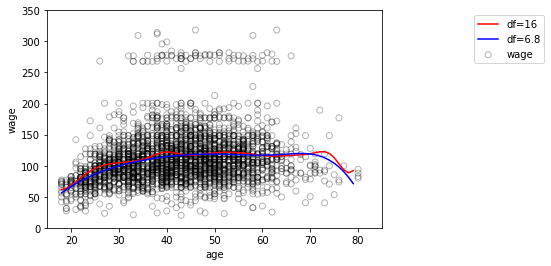

In [32]:
plt.scatter(wage['age'], wage['wage'], facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(age_grid, pred7, color='r', label='df=16')
plt.plot(age_grid, pred8, color='b', label='df=6.8')
plt.legend(bbox_to_anchor=(1.5, 1.0))
plt.xlim(15,85)
plt.ylim(0,350)
plt.xlabel('age')
plt.ylabel('wage')

# PYGAM 파일 다운 사이트 

https://pypi.org/project/pygam/#files


In [4]:
from pygam import LinearGAM , s, f

ModuleNotFoundError: No module named 'pygam'